## EasyVisa Project
***Marks: 60***

## Problem Statement

### Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries

In [1]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

## Importing Dataset

In [2]:
from google.colab import files


uploaded = files.upload()



Saving EasyVisa.csv to EasyVisa.csv


In [3]:
visa = pd.read_csv('EasyVisa.csv')

In [4]:
# copying data to another variable to avoid any changes to original data
data = visa.copy()

## Overview of the Dataset

### View the first and last 5 rows of the dataset

In [5]:
#  view top 5 rows of the data
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [6]:
# view last 5 rows of the data
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


### Understand the shape of the dataset

In [7]:
data.shape


(25480, 12)

Observation: There are 25480 rows and 12 columns in the data

### Check the data types of the columns for the dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


The type column is of object type while the rest columns are numeric.

In [9]:
# checking for null values
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

There are no null values in the dataset.

In [10]:
# checking for duplicate values
data.duplicated().sum()

0

There are no duplicate values in the data.

## Exploratory Data Analysis

EDA is an important part of any project involving data.
It is important to investigate and understand the data better before building a model with it.
A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

#### Let's check the statistical summary of the data

In [11]:
#check the statistical summary of the data.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


1. Year of Establishment (`yr_of_estab`):
   - The mean year of establishment is approximately 1979, indicating that many employers in the dataset have been established for several decades.
   - The minimum year of establishment is 1800, which seems unusual and may require further investigation to confirm data accuracy.
   - The majority of employers in the dataset were established between 1976 and 2005, as suggested by the 25th and 75th percentiles.

2. Prevailing Wage (`prevailing_wage`):
   - The mean prevailing wage is approximately $74455

   - The minimum prevailing wage is 2.14 usd which could be an outlier or an error that needs attention.
   
   - The 25th and 75th percentile prevailing wage is around 34015 usd and 107735 usd respectively.

   - The maximum prevailing wage is 319210 usd, indicating a wide range of wage levels in the dataset.

3. Number of Employees (`no_of_employees`):
   - The mean number of employees is approximately 5667, but there is a large standard deviation, suggesting significant variability in the size of the employers.
   - The minimum value is -26, which is unusual and may be a data error or missing value.
   - The 25th percentile indicates that many employers have around 1022 employees, while the 75th percentile shows approximately 3504 employees.
   - The maximum number of employees is 602069, indicating a wide range of company sizes in the dataset.

#### Fixing the negative values in number of employees columns

In [12]:
# check negative values in the employee column
data[data.no_of_employees<0]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.9900,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.1400,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.9400,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,-14,2013,South,103.9700,Hour,Y,Denied
6634,EZYV6635,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied
7224,EZYV7225,Europe,Doctorate,N,N,-25,1998,Midwest,141435.9500,Year,Y,Certified
7281,EZYV7282,Asia,High School,N,N,-14,2000,Midwest,58488.5000,Year,Y,Denied
7318,EZYV7319,Asia,Bachelor's,Y,Y,-26,2006,South,115005.6100,Year,Y,Certified
7761,EZYV7762,Asia,Master's,N,N,-11,2009,Midwest,38457.5100,Year,Y,Certified


In [13]:
# Use the abs() function to convert values to absolute values
data["no_of_employees"] = (data["no_of_employees"]).abs()

In [14]:
#checking if there are still any negative values in the column.
data[data.no_of_employees<0]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status


#### Let's check the count of each unique category in each of the categorical variables

In [15]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
--------------------------------------------------
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, 

In [16]:
#Checking the count of each unique value in the dataset
data.nunique()

case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

In [17]:
# drop the case_id column
data.drop(['case_id'],axis=1,inplace=True)

In [18]:
# confirm conversions and dropped variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.1+ MB


### Univariate Analysis

In [19]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Observations on number of employees

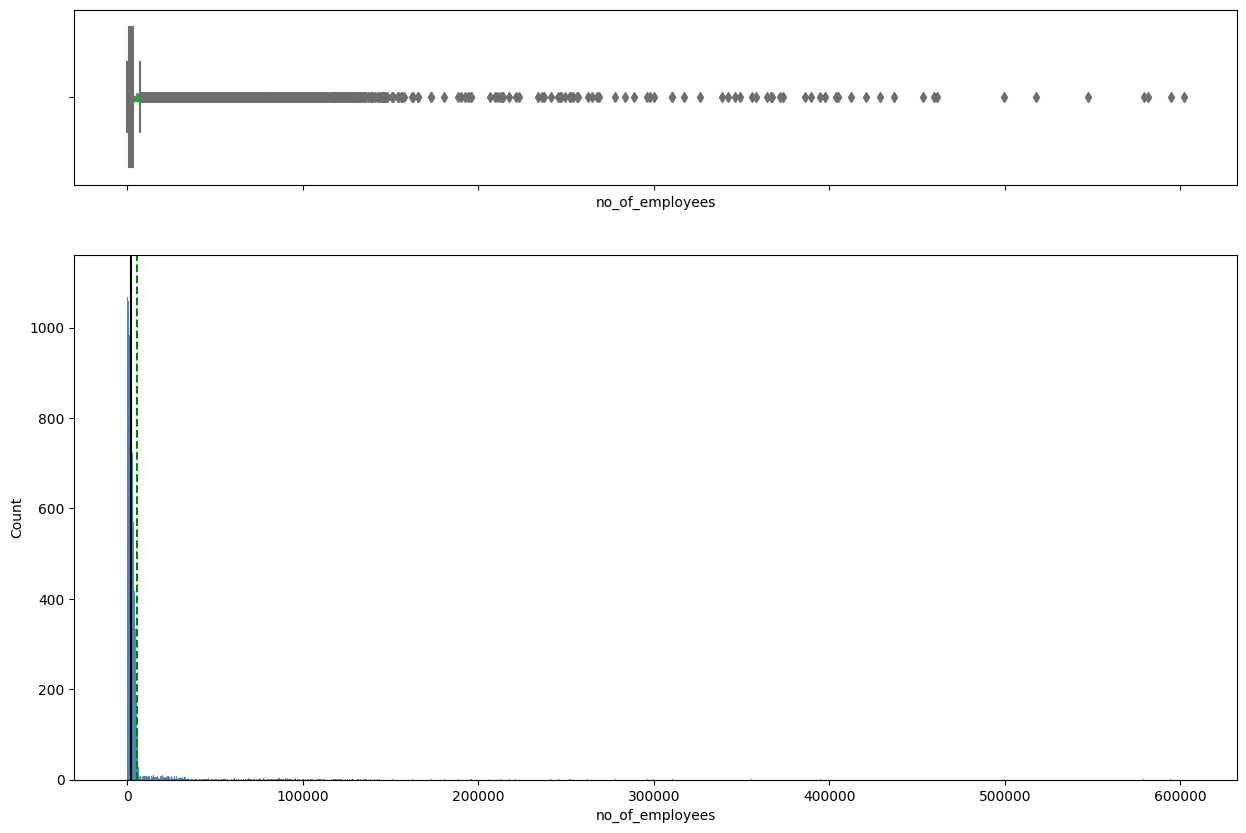

In [20]:
histogram_boxplot(data, "no_of_employees")

The plot indicate the distribution of companies by number of employee is heavily right skewed.

#### Observations on prevailing wage

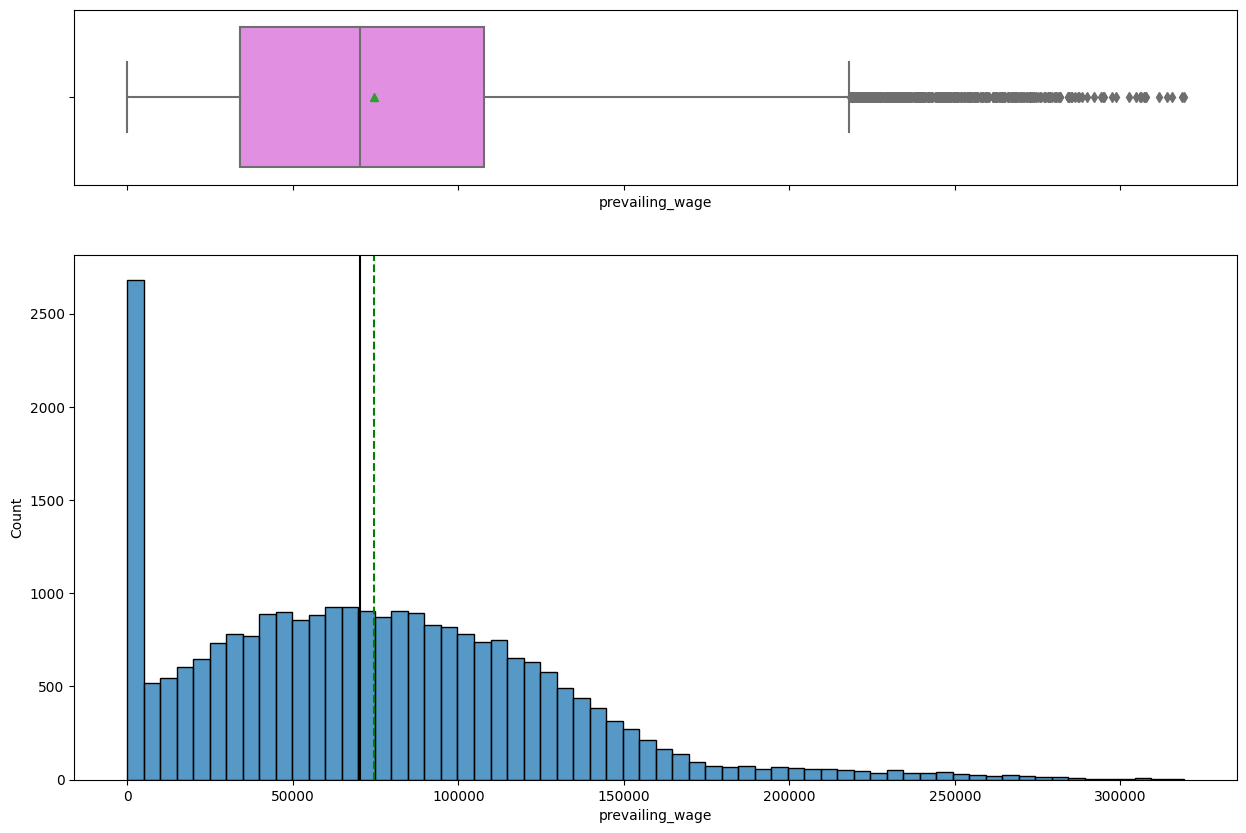

In [21]:
# histogram_boxplot for prevailing wage
histogram_boxplot ( data,"prevailing_wage")

The distribution of prevailing wages is right-skewed with a mean 74455 USD slightly exceeding the median value 70308 USD.

In [22]:
# checking the observations which have less than 100 prevailing wage
data.loc[data["prevailing_wage"] < 100]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
338,Asia,Bachelor's,Y,N,2114,2012,Northeast,15.7716,Hour,Y,Certified
634,Asia,Master's,N,N,834,1977,Northeast,3.3188,Hour,Y,Denied
839,Asia,High School,Y,N,4537,1999,West,61.1329,Hour,Y,Denied
876,South America,Bachelor's,Y,N,731,2004,Northeast,82.0029,Hour,Y,Denied
995,Asia,Master's,N,N,302,2000,South,47.4872,Hour,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25023,Asia,Bachelor's,N,Y,3200,1994,South,94.1546,Hour,Y,Denied
25258,Asia,Bachelor's,Y,N,3659,1997,South,79.1099,Hour,Y,Denied
25308,North America,Master's,N,N,82953,1977,Northeast,42.7705,Hour,Y,Denied
25329,Africa,Bachelor's,N,N,2172,1993,Northeast,32.9286,Hour,Y,Denied


In [23]:
data.loc[data["prevailing_wage"] < 100, "unit_of_wage"].value_counts()

Hour    176
Name: unit_of_wage, dtype: int64

wage less than 100USD in prevailing_wage is hourly wage

In [24]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on continent

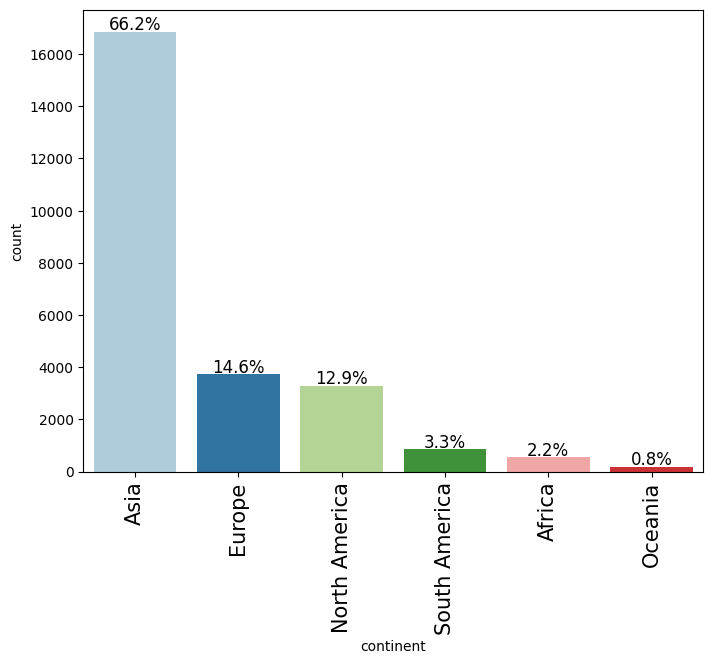

In [25]:
labeled_barplot(data, "continent", perc=True)

The majority of individuals in the dataset are of Asian origin, with Asian employees comprising a 66.2 percentage.

Oceania has the lowest representation among the continents in the dataset.

#### Observations on education of employee

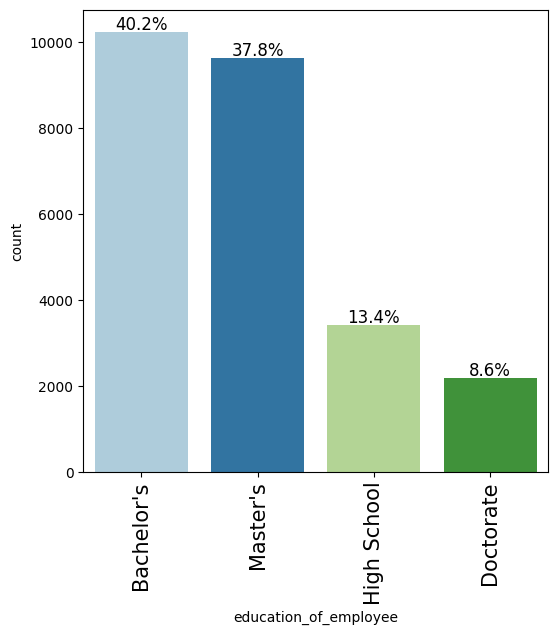

In [26]:
labeled_barplot(data,"education_of_employee", perc=True)

The largest proportion of employees hold a Bachelor's degree (40.2%), followed closely by those with a Master's degree (37.8%).

A relatively small percentage (8.6%) of employees hold a doctorate degree.

#### Observations on job experience

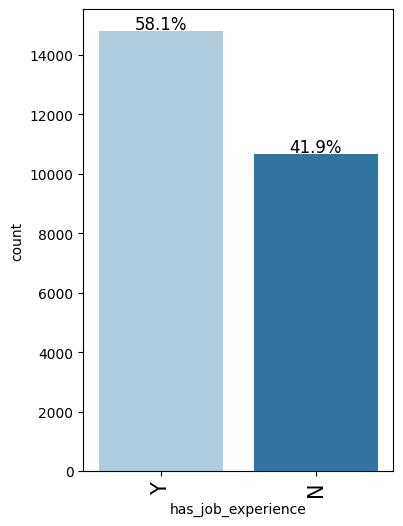

In [27]:
labeled_barplot(data, "has_job_experience", perc=True)

58.1% employees has job experience.

#### Observations on job training

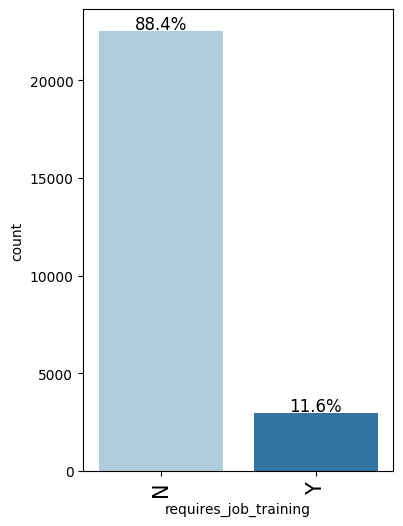

In [28]:
labeled_barplot(data, "requires_job_training", perc=True)

The majority of employees (88.4%) indicate a need for job training, with only a 11.6% reporting that they do not require training.

#### Observations on region of employment

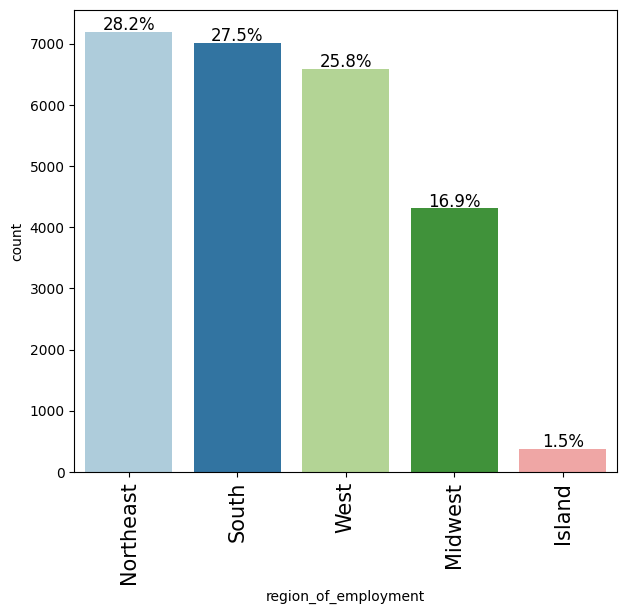

In [29]:
labeled_barplot(data, "region_of_employment", perc=True)

The plot reveals a diverse distribution of employment regions :

Northeast: Approximately 28.2% of employees are employed in the Northeast region, making it the most common employment destination among the respondents.

South: The Southern region closely follows, with 27.5% of employees.

West: The Western region comes next, with 25.8% of employees working in this area.

Midwest: The Midwest region is represented by 16.9% of employees.

Island: While the Island region accounts for the smallest percentage at 1.5%.

#### Observations on unit of wage

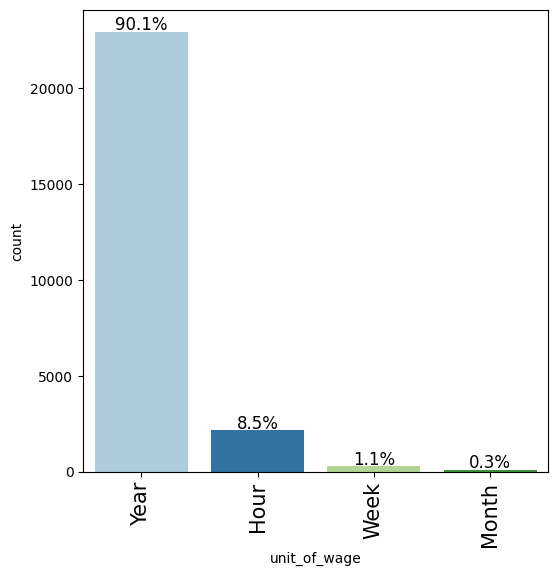

In [30]:
labeled_barplot(data, "unit_of_wage", perc=True)

The distribution of wage units in the dataset reveals how employees' compensation is structured.

Yearly Wage (Year): The most prevalent unit of wage is yearly, accounting for a majority at 90.1%. This suggests that the majority of employees receive their wages on an annual basis, commonly associated with salaried positions.

Hourly Wage (Hour): Approximately 8.5% of employees receive wages on an hourly basis.

Weekly Wage (Week): Weekly wages are less common, with only 1.1% of employees receiving compensation on a weekly basis.

Monthly Wage (Month): Monthly wages are the least common, representing just 0.3% of the distribution.

#### Observations on case status

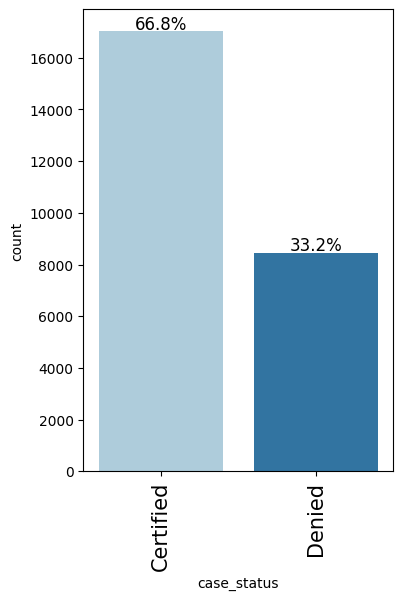

In [31]:
labeled_barplot(data, "case_status", perc=True)

The visa application process resulted in approval for 66.8% of employees, whereas 33.2% of employees experienced visa application denials.


### Bivariate Analysis

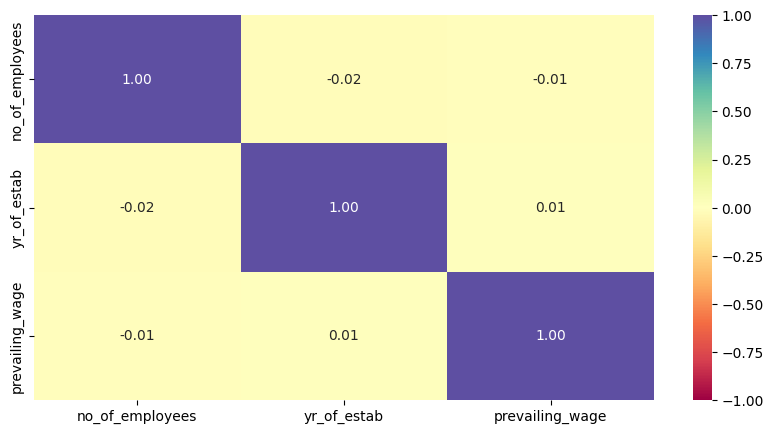

In [32]:
# To find the correlation between the variables
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

There are very weak correlation amongst these variables.

In [33]:
# function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [34]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?



case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


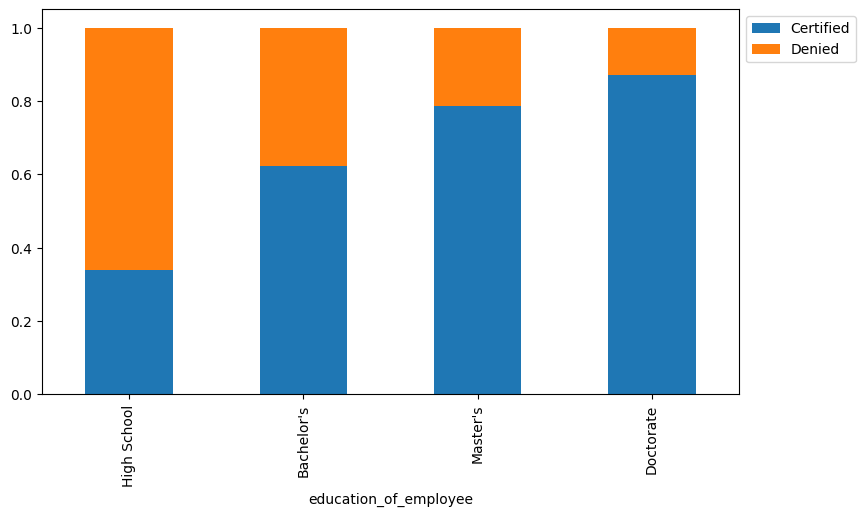

In [35]:
stacked_barplot(data, "education_of_employee", "case_status")

1. Overally, 17018 applications (approximately 66.8%) were certified indicating successful visa approvals, while 8,462 applications (approximately 33.2%) were denied.

2. Employees with a Bachelor's degree accounted for 10,234 cases. Of these, approximately 62.2% received approval of their visa applications, while approximately 37.8% were denials.

3. 3420 visa applications from employees with a High School education. In this group, 1164 applicants (approximately 34%) were certified, while 2256 (approximately 66%) got visa denials.

4. Employees holding a Master's degree constituted 9634 cases. Among them, approximately 78.6% received visa approval, while approximately 21.4% got visa application denials.

5. A total of 2192 visa applications came from employees with a Doctorate degree. Of these, approximately 87.3% were certified, while approximately 12.7% received denials.

These findings demonstrate varying visa approval rates based on the education level of employees. Employees with higher educational qualifications, such as Master's and Doctorate degrees, tend to have higher certification rates, while those with High School education face relatively higher denial rates.

#### Different regions have different requirements of talent having diverse educational backgrounds. Let's analyze it further

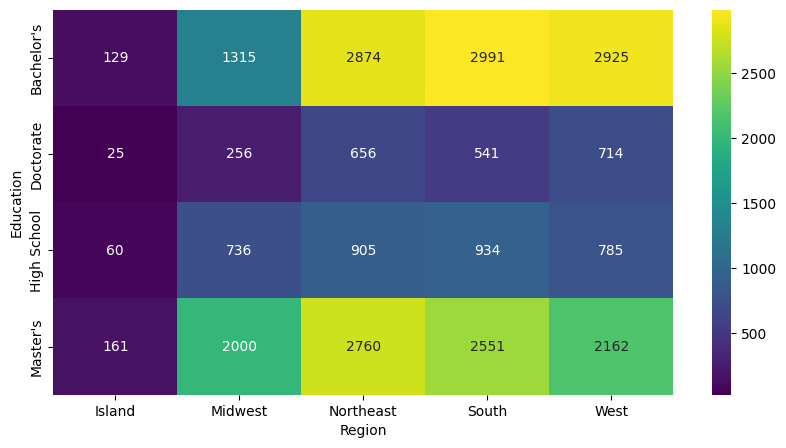

In [36]:
# plot heatmap for the crosstab between education and region of employment
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(data["education_of_employee"], data["region_of_employment"]),
    annot=True,
    fmt="g",
    cmap="viridis"
)

plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

Employees with bachelor degree or above are most wanted in Northeat, South and West regions.

While on Island region, the demand of employees from different education level is very low, especially for doctorate leve. It makes that Island region is remote and offer less employments.

#### Let's have a look at the percentage of visa certifications across each region

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


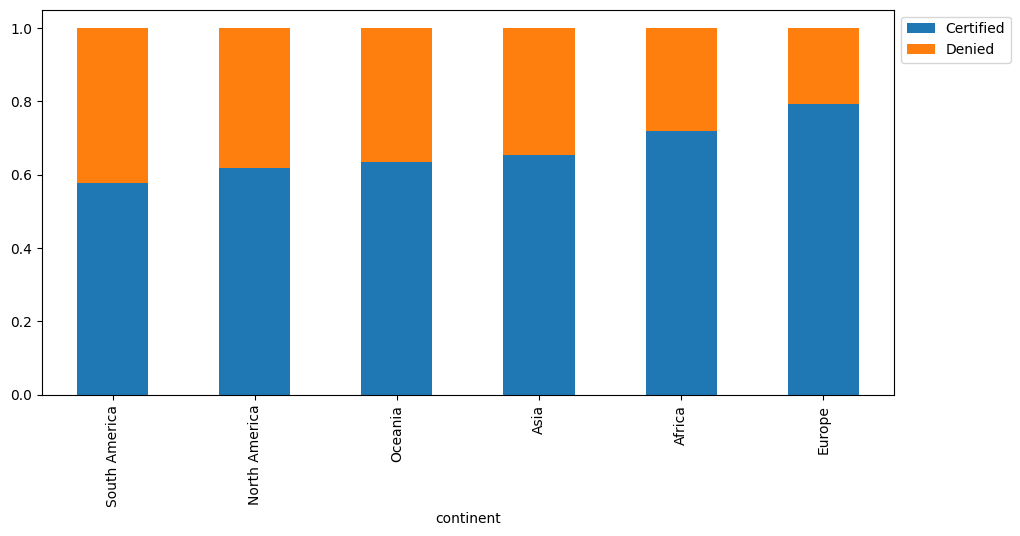

In [37]:
stacked_barplot(data, "continent", "case_status")

Employee from Europe has the highest vis approval rate, while those from South America has a lower visa approval rate.

#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


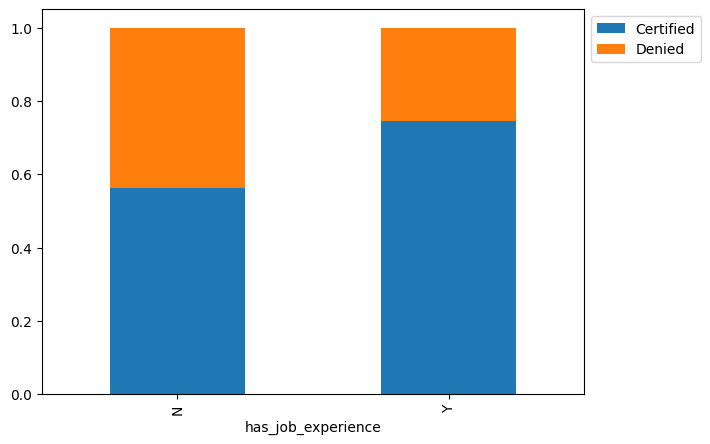

In [38]:
stacked_barplot(data, "has_job_experience", "case_status")

Employees with job experience ("Y") have a higher visa approval rate compared to those without job experience. The visa approval rate for those with job experience is approximately 74.6%.

#### Do the employees who have prior work experience require any job training?

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


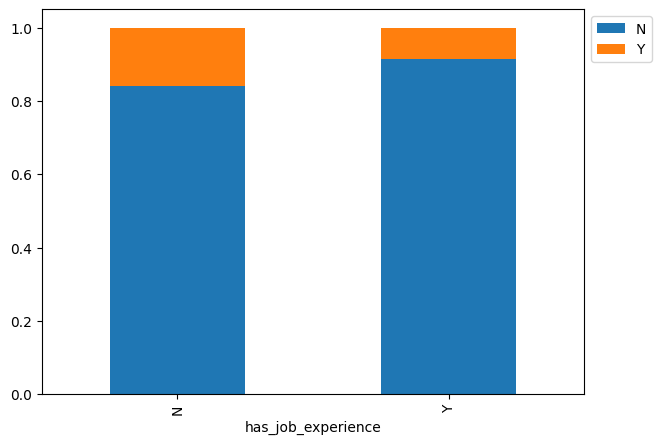

In [39]:
stacked_barplot(data, "has_job_experience", "requires_job_training")

# The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

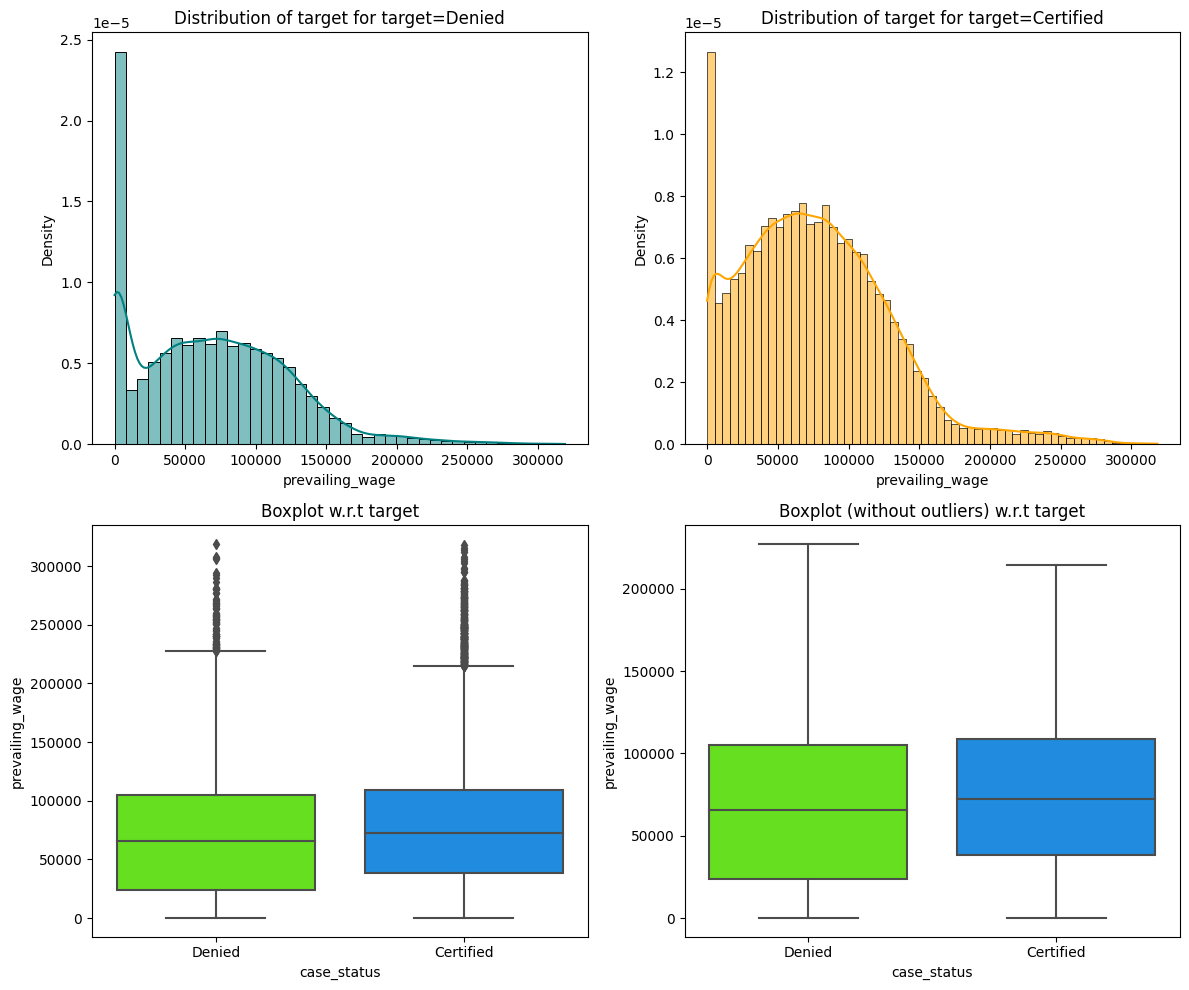

In [40]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

- The boxplot indicates that the median of prevailing wage of visa approval is higher than that in denied visa result.  



#### Checking if the prevailing wage is similar across all the regions of the US

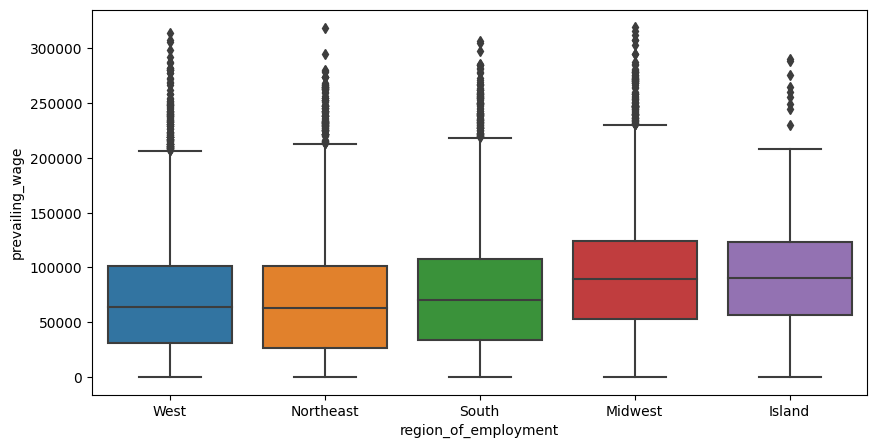

In [41]:
plt.figure(figsize=(10, 5))
sns.boxplot (data= data, x= 'region_of_employment', y= 'prevailing_wage')
plt.show()

- Analyzing the box plots, we can note that the Island and Midwest regions display higher prevailing wages in the 75th percentile when contrasted with other regions.

- Conversely, the Northeast and West regions of employment show the lowest prevailing wages, while the South region falls in the middle range.

- It's worth highlighting that the Northeast and Midwest regions stand out with the highest recorded maximum prevailing wages among all the regions.

#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


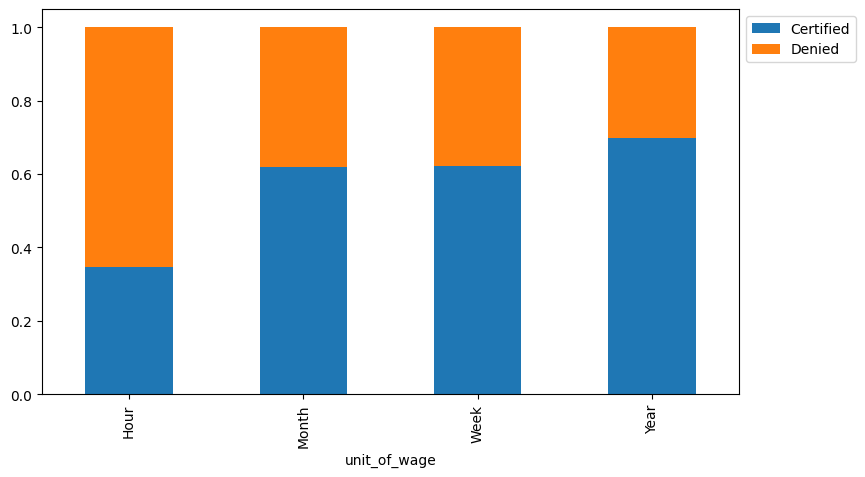

In [42]:
# plot the stacked barplot for unit of wage and case status
stacked_barplot(data, "unit_of_wage", "case_status")

- The majority of applications have wages reported in the "Year" unit, with 22,962 applications. Among these, 16,047 were approved , and 6,915 were denied, resulting in a certification rate of approximately 69.8%.

- In the wages in the "Hour" unit, with 2,157 applications. Of these, 747 were approved, and 1,410 were denied, leading to the loweest visa approval rate of approximately 34.7%.

## Data Preprocessing

### Outlier Check

- Let's check for outliers in the data.

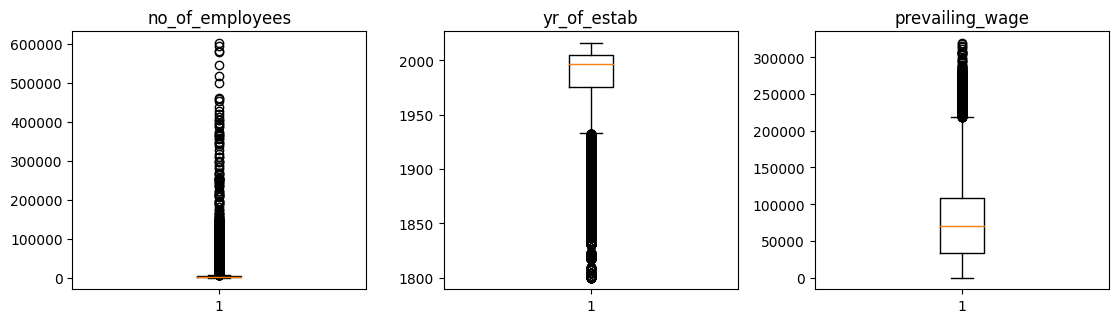

In [43]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

There are quite a few outliers in the data.
However, we will not treat them as they are proper values.

### Data Preparation for modeling

- We want to predict which visa will be certified.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [44]:
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

X = data.drop(['case_status'], axis=1)
Y = data["case_status"]

#getting dummies for the categorical variables
X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets in the ratio 70:30
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=1, stratify=Y)


In [45]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


## Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified.

### Which case is more important?
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy.



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.
* We will use balanced class weights so that model focuses equally on both classes.

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [46]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [47]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree - Model Building and Hyperparameter Tuning

### Decision Tree Model

In [48]:
decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.664835  0.742801   0.752232  0.747487


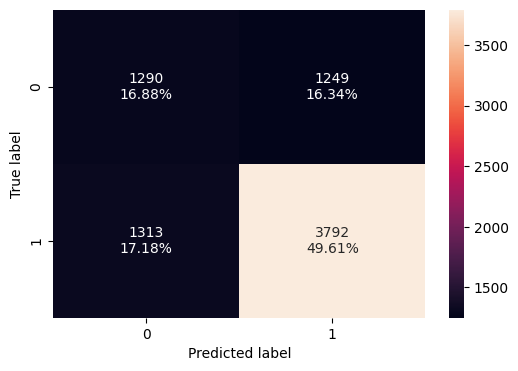

In [49]:
#Calculating different metrics
decision_tree_perf_train = model_performance_classification_sklearn(decision_tree,X_train,y_train)
print("Training performance:\n",decision_tree_perf_train)
decision_tree_perf_test = model_performance_classification_sklearn(decision_tree,X_test,y_test)
print("Testing performance:\n",decision_tree_perf_test)

#Creating confusion matrix for testing
confusion_matrix_sklearn(decision_tree,X_test,y_test)

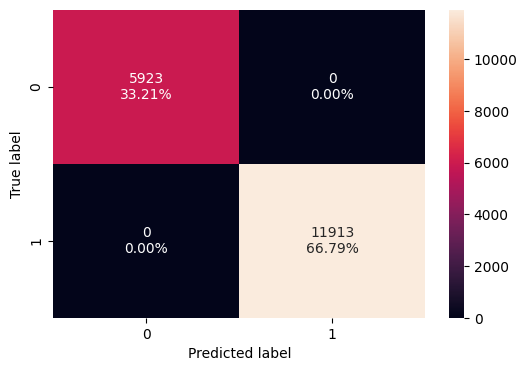

In [50]:
#creating the confusion matrix for the training set
confusion_matrix_sklearn(decision_tree,X_train,y_train)

The decision tree is overfitting the training data.
Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning - Decision Tree

In [51]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

In [52]:
#Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)


Training performance:
    Accuracy    Recall  Precision        F1
0  0.712548  0.931923   0.720067  0.812411
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.706567  0.930852   0.715447  0.809058


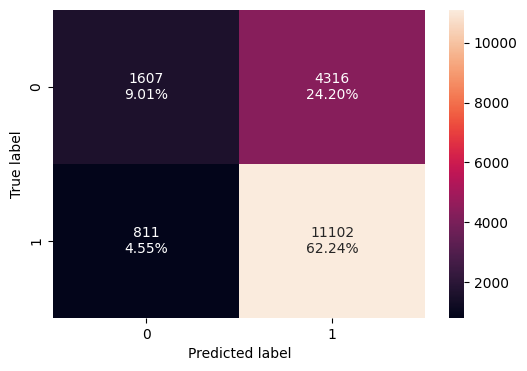

In [53]:
#  create confusion matrix for train data on tuned estimator
confusion_matrix_sklearn(dtree_estimator,X_train,y_train)

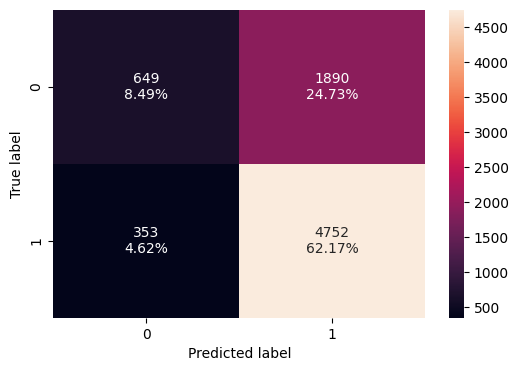

In [54]:
#  create confusion matrix for test data on tuned estimator
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

The overfitting has reduced and the F1 score has improved.
Let's try some other models.

## Bagging - Model Building and Hyperparameter Tuning

### Bagging Classifier

In [55]:
bagging_estimator = BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)



BaggingClassifier(random_state=1)

#### Checking model performance on training set

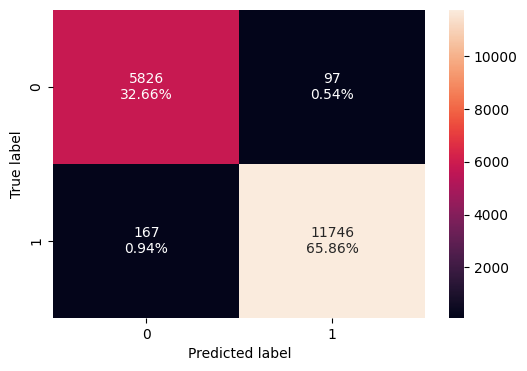

In [56]:
confusion_matrix_sklearn(bagging_estimator , X_train, y_train)

In [57]:
#check performance on train data
bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_estimator, X_train, y_train)
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.985198,0.985982,0.99181,0.988887


#### Checking model performance on test set

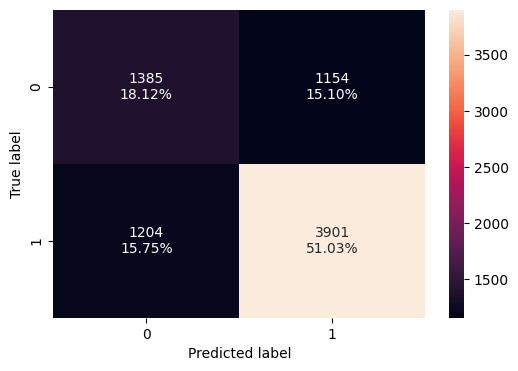

In [58]:
#Getting the confusion matrix for the test data
confusion_matrix_sklearn(bagging_estimator,X_test,y_test)

In [59]:
# check performance for test data
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_estimator, X_test, y_test)
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.691523,0.764153,0.771711,0.767913


Bagging classifier is overfitting on the training data.
Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning - Bagging Classifier

In [60]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 111, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=100,
                  random_state=1)

#### Checking model performance



In [61]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print(bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print(bagging_estimator_tuned_model_test_perf)

   Accuracy    Recall  Precision        F1
0  0.996187  0.999916   0.994407  0.997154
   Accuracy    Recall  Precision        F1
0  0.724228  0.895397   0.743857  0.812622


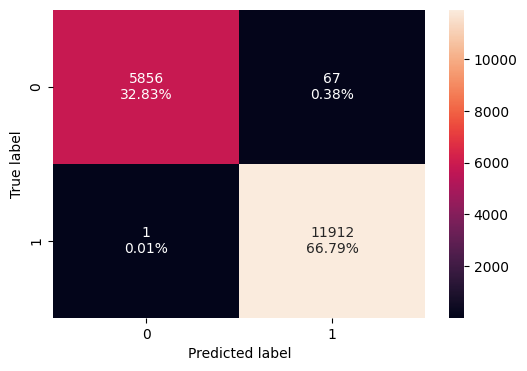

In [62]:
# create confusion matrix for train data on tuned estimator

confusion_matrix_sklearn(bagging_estimator_tuned,X_train,y_train)

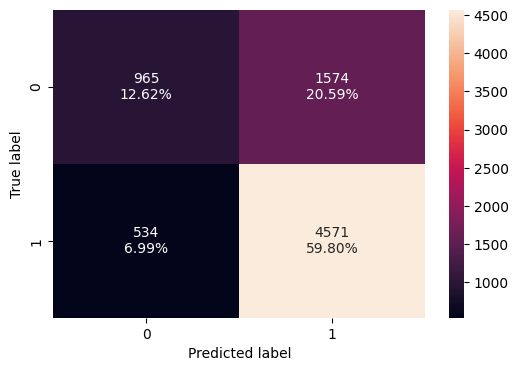

In [63]:
#  create confusion matrix for test data on tuned estimator
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

The model is still found to overfit on the training data.

### Random Forest

In [64]:
# Fitting the model

rf_estimator = RandomForestClassifier(random_state=1, class_weight='balanced')
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

#### Checking model performance on training set

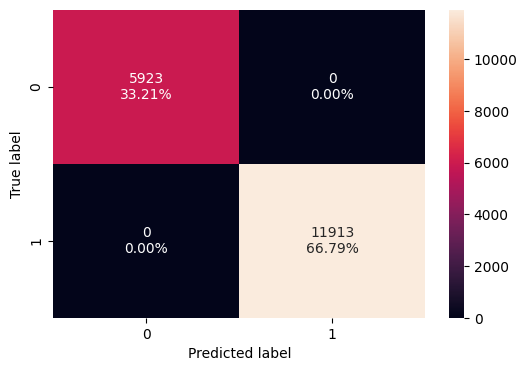

In [65]:
# create confusion matrix for train data
confusion_matrix_sklearn(rf_estimator,X_train,y_train)

In [66]:
# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator,X_train,y_train)
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Checking model performance on test set

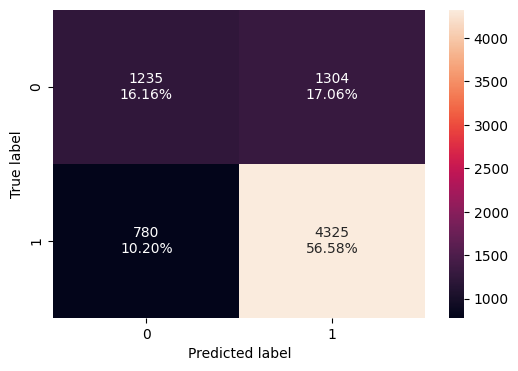

In [67]:
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

In [68]:
#  check performance for test data
rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator,X_test,y_test)
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.727368,0.847209,0.768343,0.805851


Random forest is giving overfitting on the training data.
Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning - Random Forest

In [69]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=7, n_estimators=20,
                       oob_score=True, random_state=1)

#### Checking model performance on training set

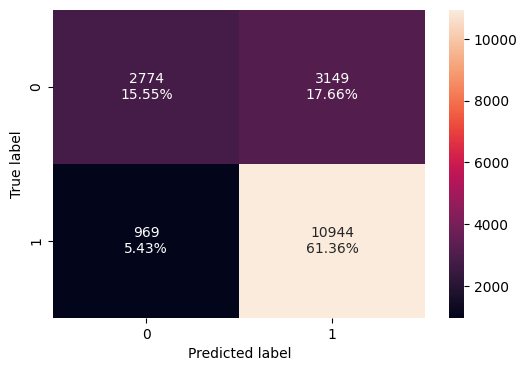

In [70]:
# create confusion matrix for train data on tuned estimator
confusion_matrix_sklearn(rf_tuned,X_train,y_train)


In [71]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned, X_train, y_train)
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.769119,0.91866,0.776556,0.841652


#### Checking model performance on test set

In [72]:
# create confusion matrix for test data on tuned estimator

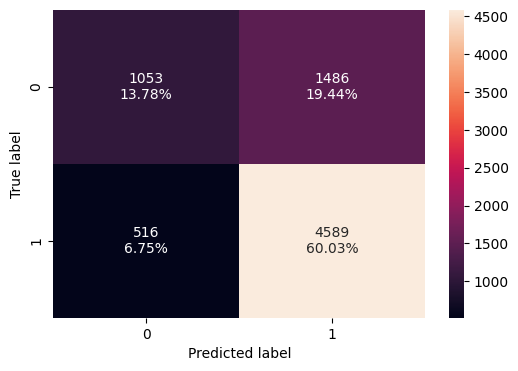

In [73]:
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

In [74]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned, X_test, y_test)
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.738095,0.898923,0.755391,0.82093


The overfitting has reduced and F1 score has increased.


In [75]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
education_of_employee_High School  0.234452
prevailing_wage                    0.150029
has_job_experience_Y               0.118696
education_of_employee_Master's     0.085766
no_of_employees                    0.067280
yr_of_estab                        0.058228
education_of_employee_Doctorate    0.055792
unit_of_wage_Year                  0.046702
continent_Europe                   0.041715
region_of_employment_Midwest       0.024973
continent_Asia                     0.016195
region_of_employment_West          0.015561
full_time_position_Y               0.014733
region_of_employment_South         0.014553
continent_North America            0.013878
requires_job_training_Y            0.012244
region_of_employment_Northeast     0.010722
continent_South America            0.008815
unit_of_wage_Week                  0.004329
continent_Oceania                  0.003455
unit_of_wage_Month                 0.001881


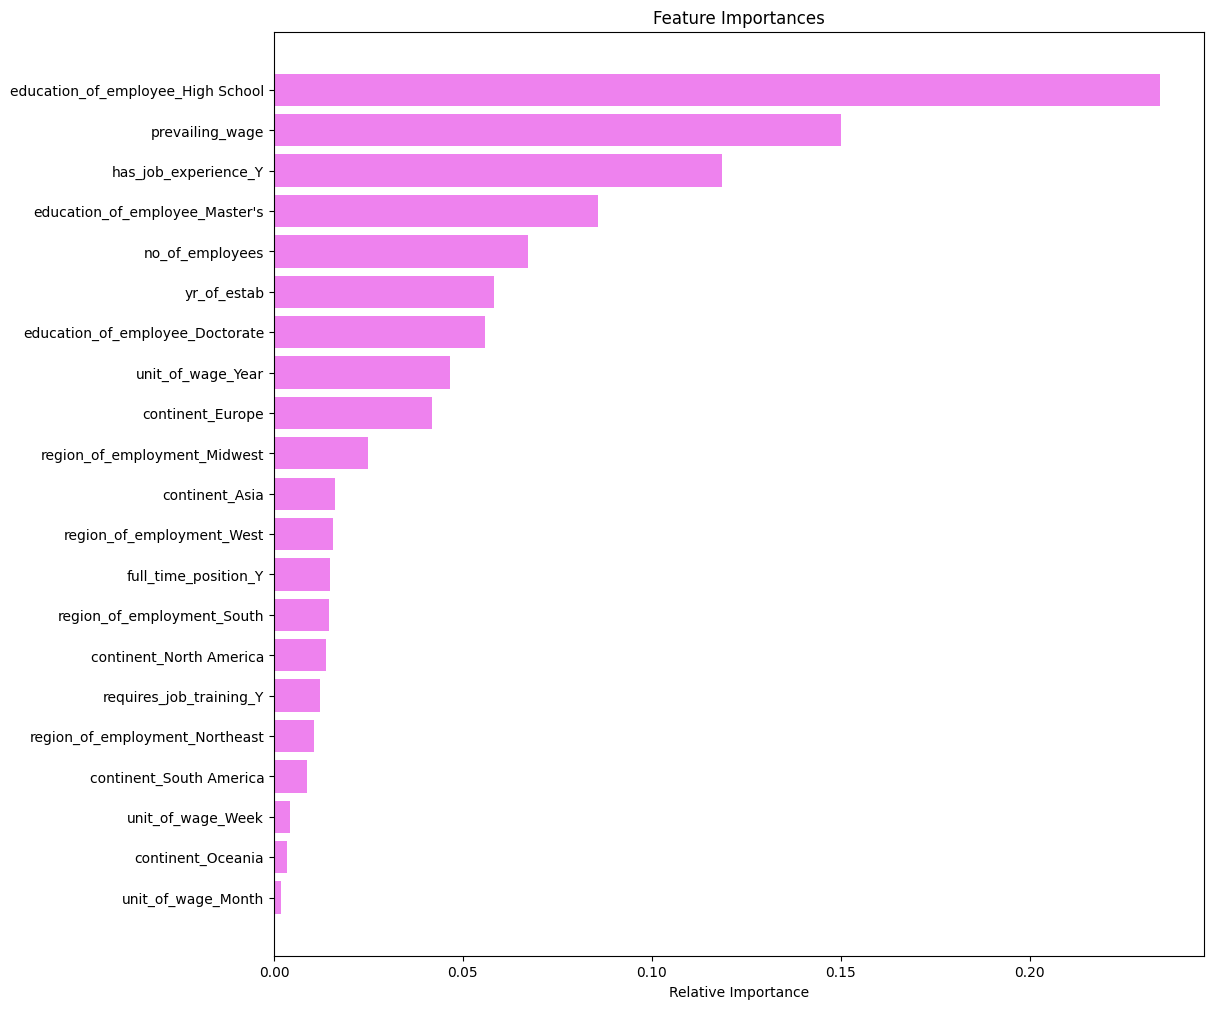

In [76]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

education_of_employee is the most important feature on this tuned model.


## Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Classifier

In [77]:
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

#### Checking model performance on training set

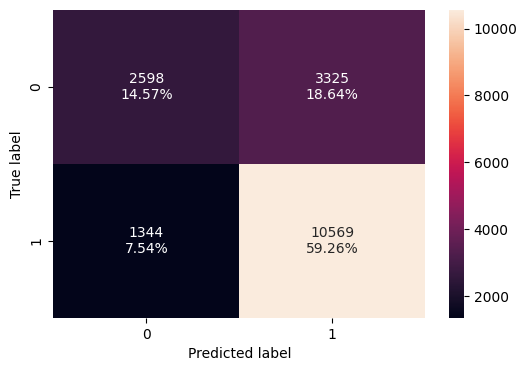

In [78]:
# create confusion matrix for train data
confusion_matrix_sklearn(ab_classifier,X_train,y_train)

In [79]:
# check performance on train data
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier,X_train,y_train)
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.738226,0.887182,0.760688,0.81908


#### Checking model performance on test set

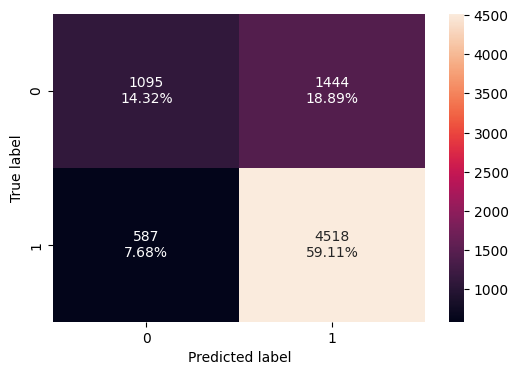

In [80]:
# create confusion matrix for test data
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

In [81]:
ab_classifier_model_test_perf = model_performance_classification_sklearn (ab_classifier,X_test,y_test)
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.734301,0.885015,0.757799,0.816481


### Hyperparameter Tuning - AdaBoost Classifier

In [82]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

#### Checking model performance on training set

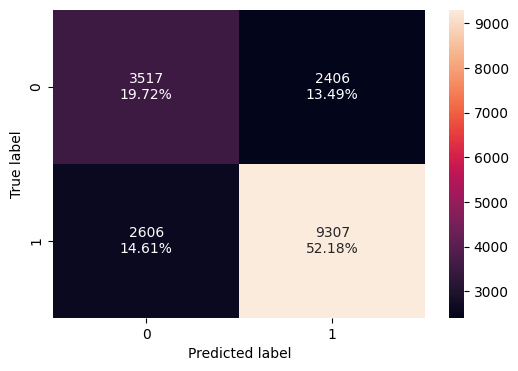

In [83]:
# create confusion matrix for train data on tuned estimator
confusion_matrix_sklearn(abc_tuned,X_train,y_train)

In [84]:
# check performance for train data on tuned estimator

abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned,X_train,y_train)
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.718995,0.781247,0.794587,0.787861


#### Checking model performance on test set

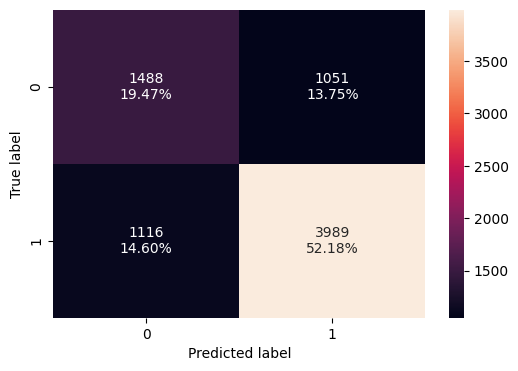

In [85]:
# create confusion matrix for for test data on tuned estimator
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

In [86]:
#check performance for test data on tuned estimator
abc_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned,X_test,y_test)
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.71651,0.781391,0.791468,0.786397


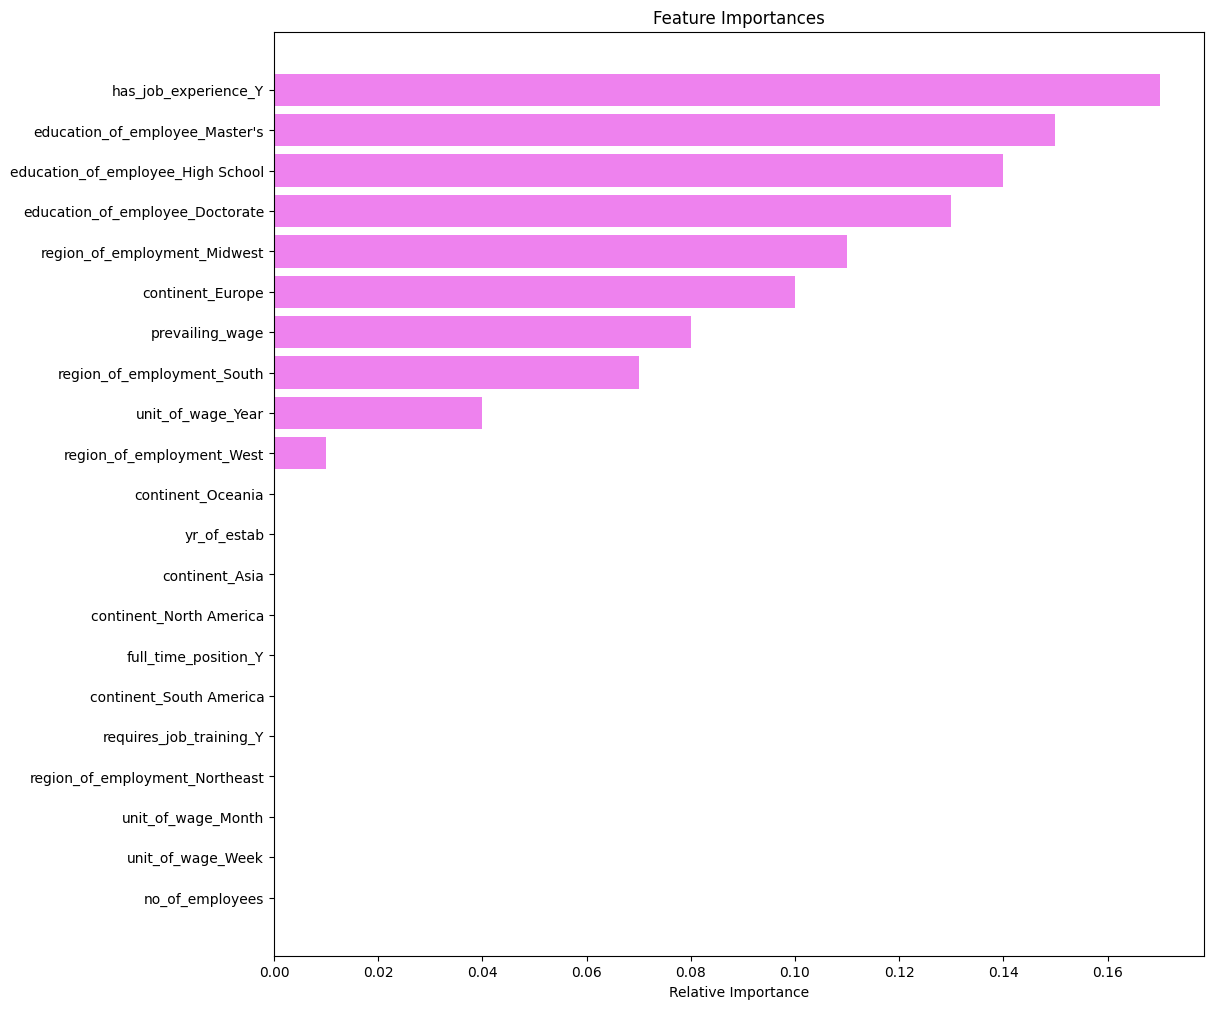

In [87]:
#Checking the important features of the model
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- The hyperparameter tuned model is giving similar performance to the default AdaBoost model with the F1 score decrease a bit.

- Has job experience is the most important feature in this model.

### Gradient Boosting Classifier

In [88]:
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

#### Checking model performance on training set

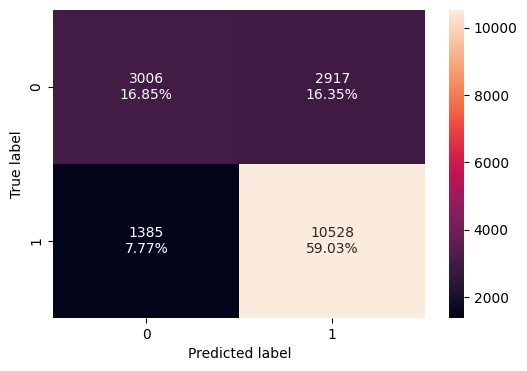

In [89]:
# create confusion matrix for train data
confusion_matrix_sklearn(gb_classifier,X_train,y_train)

In [90]:
# check performance on train data
gb_classifier_model_train_perf = model_performance_classification_sklearn(gb_classifier,X_train,y_train)
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.758802,0.88374,0.783042,0.830349


#### Checking model performance on test set

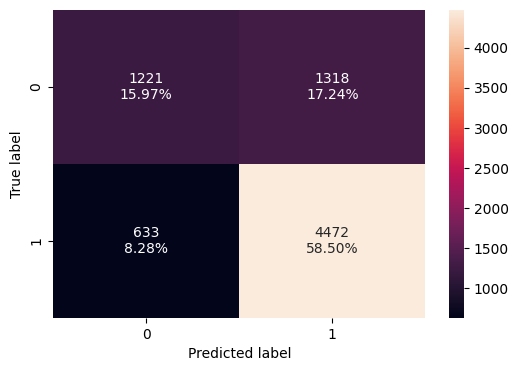

In [91]:
# create confusion matrix for test data
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

In [92]:
# check performance for test data
gb_classifier_model_test_perf = model_performance_classification_sklearn(gb_classifier,X_test,y_test)
gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744767,0.876004,0.772366,0.820927


- This model is giving generalized performance on both the training and testing data with very high F1 scores.

- This indicates that the model is generalizing well and is effective in capturing patterns and making accurate predictions on new data.

### Hyperparameter Tuning - Gradient Boosting Classifier

In [93]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=200, random_state=1,
                           subsample=1)

#### Checking model performance on training set

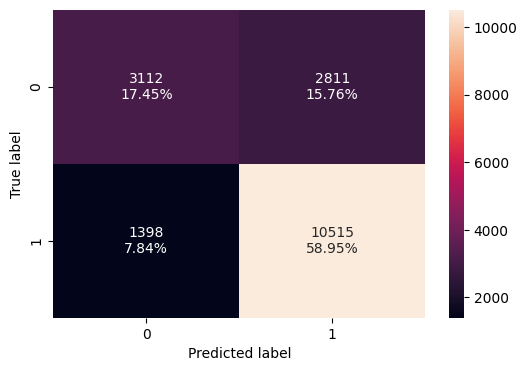

In [94]:
# create confusion matrix for train data on tuned estimator
confusion_matrix_sklearn(gbc_tuned,X_train,y_train)

In [95]:
# check performance for train data on tuned estimator
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.764017,0.882649,0.789059,0.833234


#### Checking model performance on test set

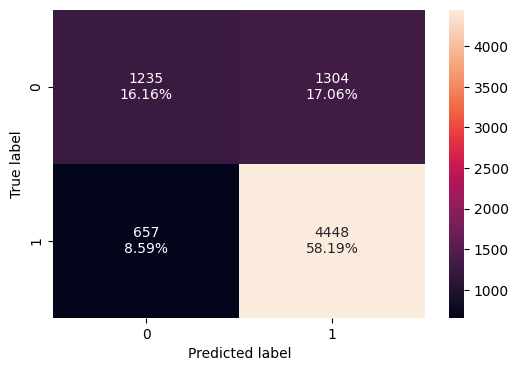

In [96]:
#create confusion matrix for test data on tuned estimator
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

In [97]:
# check performance for test data on tuned estimator
gbc_tuned_model_test_perf = model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.743459,0.871303,0.773296,0.819379


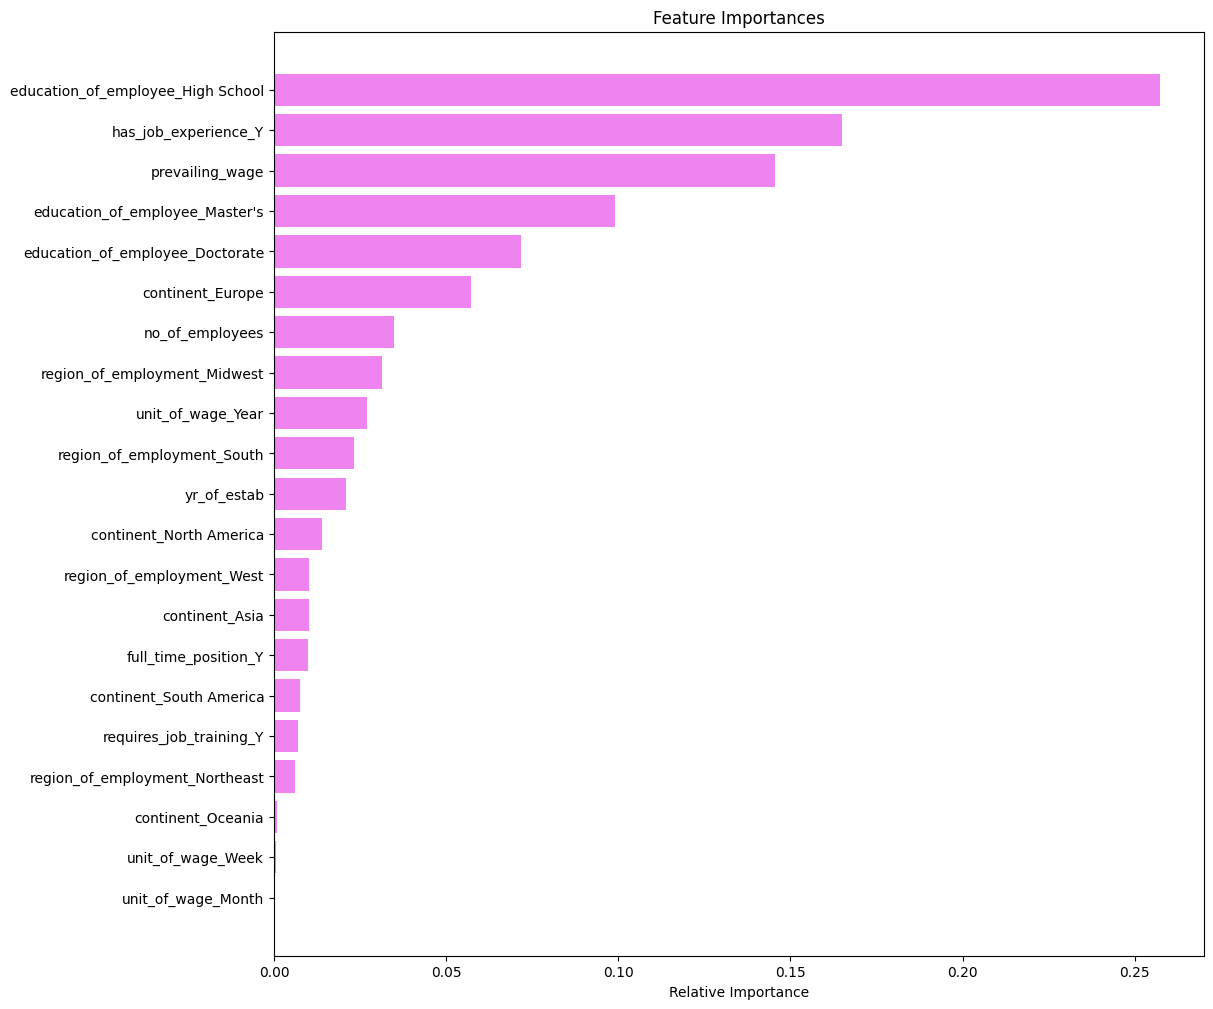

In [98]:
# Checking the important features
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- There is quite similiar in the model performance after hyperparameter tuning.

- The most impotant feature of this model is education_of_employee.

### XGBoost Classifier

In [99]:
xgb_classifier = XGBClassifier(random_state=1,eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

#### Checking model performance on training set

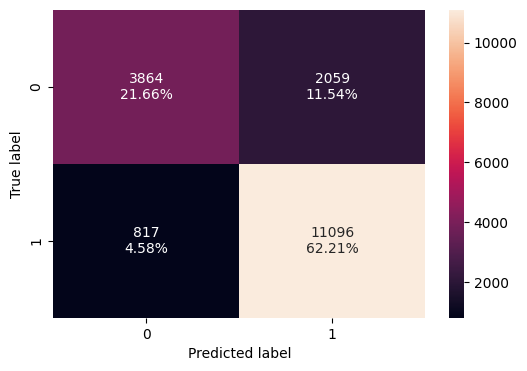

In [100]:
# create confusion matrix for train data
confusion_matrix_sklearn(xgb_classifier,X_train,y_train)

In [101]:
#check performance on train data
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.838753,0.931419,0.843482,0.885272


#### Checking model performance on test set

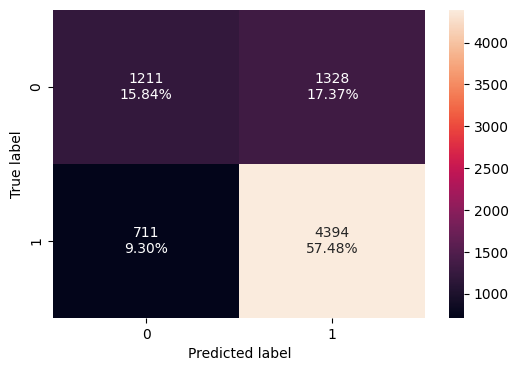

In [102]:
# create confusion matrix for test data
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

In [103]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
xgb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.733255,0.860725,0.767913,0.811675


### Hyperparameter Tuning - XGBoost Classifier

In [104]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [ 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=5, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

#### Checking model performance on training set

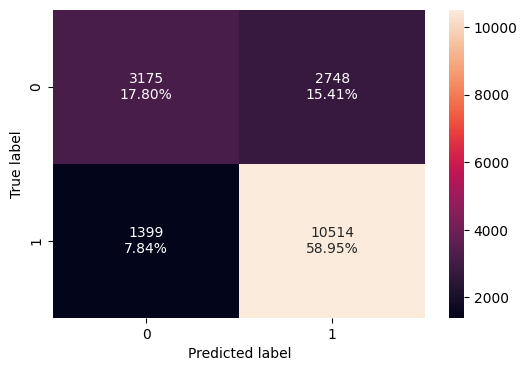

In [105]:
# to create confusion matrix for train data on tuned estimator
confusion_matrix_sklearn(xgb_tuned,X_train,y_train)

In [106]:
#check performance for train data on tuned estimator
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.767493,0.882565,0.792791,0.835273


#### Checking model performance on test set

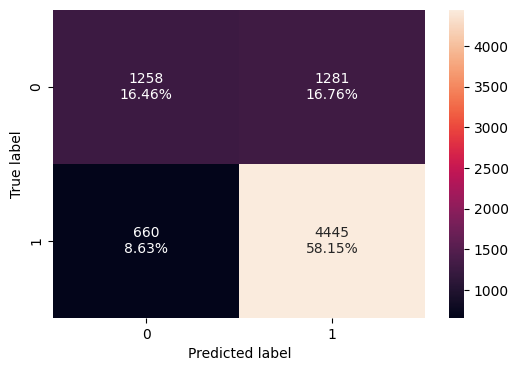

In [107]:
# create confusion matrix for test data on tuned estimator
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

In [108]:
xgb_tuned_model_test_perf = model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.767493,0.882565,0.792791,0.835273


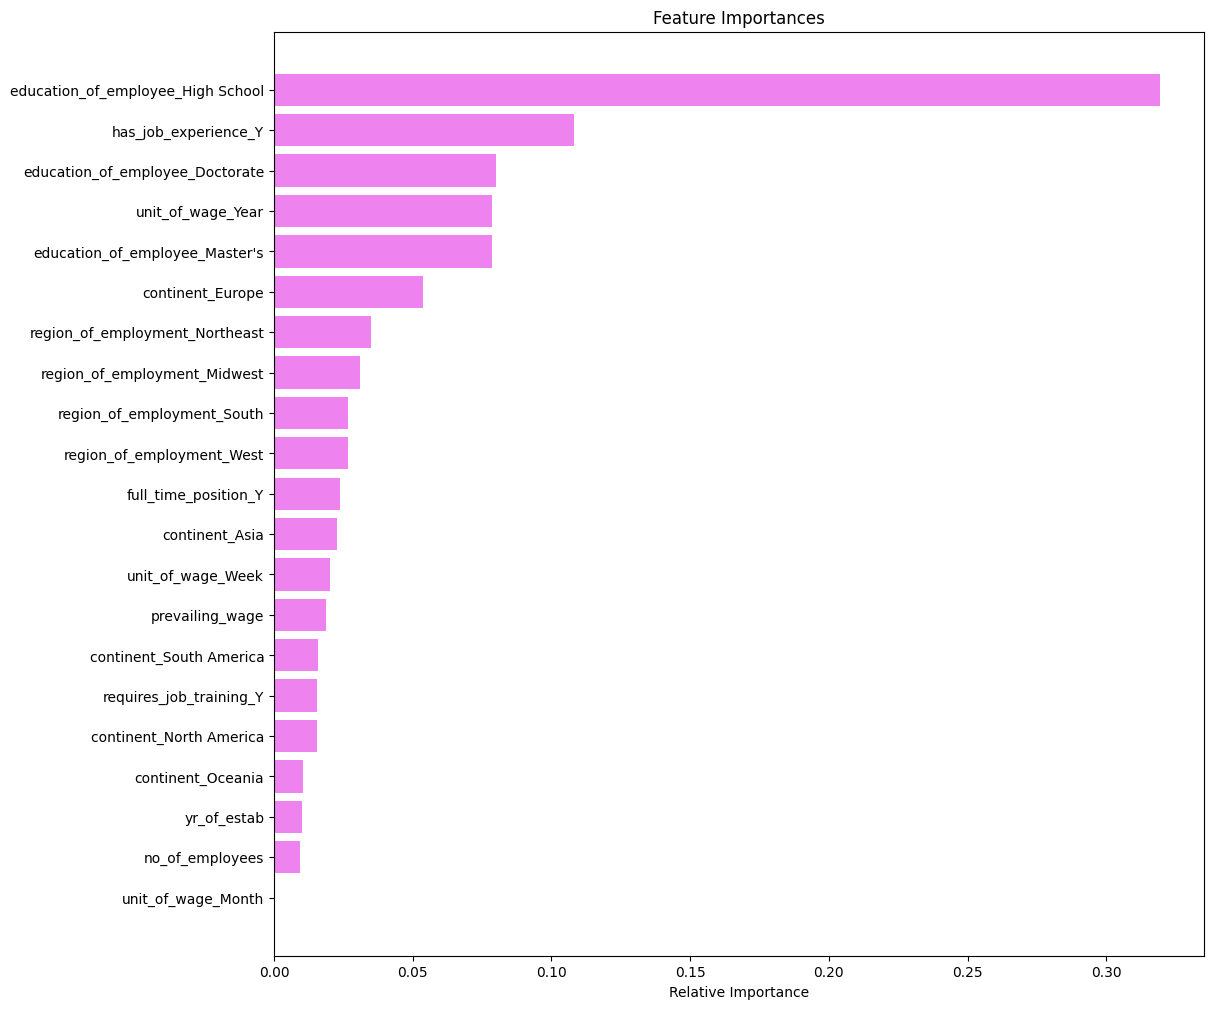

In [109]:
# Checking the important features
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Stacking Classifier

In [110]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       min_samples_split=7,
                                                       n_estimators=20,
                                                       oob_score=True,
                                                       random_state=1))],...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.1,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=150, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None, random_state=1, ...))

### Checking model performance on training set

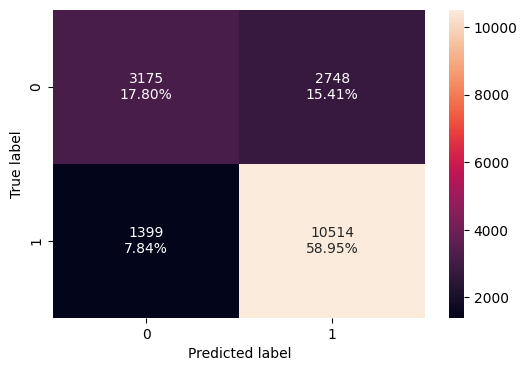

In [111]:
# create confusion matrix for train data
confusion_matrix_sklearn(final_estimator,X_train,y_train)

In [112]:
#check performance on train data
stacking_classifier_model_train_perf = model_performance_classification_sklearn(final_estimator,X_train,y_train)
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.767493,0.882565,0.792791,0.835273


### Checking model performance on test set

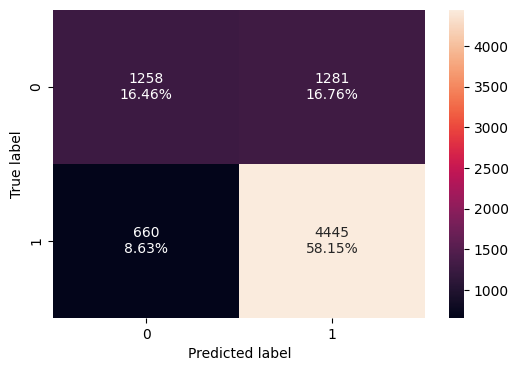

In [113]:
# create confusion matrix for test data
confusion_matrix_sklearn(final_estimator,X_test,y_test)

In [114]:
stacking_classifier_model_test_perf = model_performance_classification_sklearn(final_estimator,X_test,y_test)
stacking_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.746075,0.870715,0.776284,0.820792


Overall, the model appears to have reasonable performance on both the training and testing datasets, with good recall, precision, and F1 scores.

However , this model seems have difficulty in correctly identifying cases for denials.

The overall performance of this model is balanced and is not showing overfitting.


## Model Performance Comparison and Final Model Selection

In [115]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.712548,0.985198,0.996187,1.0,0.769119,0.738226,0.718995,0.758802,0.764017,0.838753,0.767493,0.767493
Recall,1.0,0.931923,0.985982,0.999916,1.0,0.918660,0.887182,0.781247,0.883740,0.882649,0.931419,0.882565,0.882565
Precision,1.0,0.720067,0.991810,0.994407,1.0,0.776556,0.760688,0.794587,0.783042,0.789059,0.843482,0.792791,0.792791
F1,1.0,0.812411,0.988887,0.997154,1.0,0.841652,0.819080,0.787861,0.830349,0.833234,0.885272,0.835273,0.835273


In [116]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [decision_tree_perf_test.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.664835,0.706567,0.691523,0.724228,0.727368,0.738095,0.734301,0.716510,0.744767,0.743459,0.733255,0.746075,0.746075
Recall,0.742801,0.930852,0.764153,0.895397,0.847209,0.898923,0.885015,0.781391,0.876004,0.871303,0.860725,0.870715,0.870715
Precision,0.752232,0.715447,0.771711,0.743857,0.768343,0.755391,0.757799,0.791468,0.772366,0.773296,0.767913,0.776284,0.776284
F1,0.747487,0.809058,0.767913,0.812622,0.805851,0.820930,0.816481,0.786397,0.820927,0.819379,0.811675,0.820792,0.820792


- Overfitting in Decision Tree and Random Forest: The Decision Tree and Random Forest models have achieved perfect accuracy, recall, precision, and F1 score on the training data. This is a clear sign of overfitting, where the models have learned the training data extremely well but may not generalize to unseen data.

- Bagging Classifier Generalizes Well: The Bagging Classifier has performed very well on the training data with high scores in accuracy, recall, precision, and F1 score. While it may still overfit to some extent, it seems to generalize better compared to Decision Tree and Random Forest.

- Gradient Boosting Models: The Gradient Boost Classifier and its tuned version have achieved good training performance with a balance between bias and variance. They are less prone to overfitting compared to Decision Tree and Random Forest.

- XGBoost Classifier: The untuned XGBoost Classifier has also performed well on the training data, similar to the Bagging Classifier. The tuned XGBoost Classifier has a slight improvement.

This indicates that XGBoost is a strong performer.

- Stacking Classifier: The stacking classifier's performance on the testing data is in line with the other models, showing that it can generalize reasonably well.

- Tuned Decision Tree, Tuned Bagging Classifier, Tuned Random Forest, Tuned Adaboost Classifier, Tuned Gradient Boost Classifier, XGBoost Classifier (Tuned), and the Stacking Classifier demonstrate good performance. Out of these models, the XGBoost Classifier (Tuned) and the Stacking Classifier are considered the top-performing models with the highest F1 score on the testing set.

### Important features of the final model

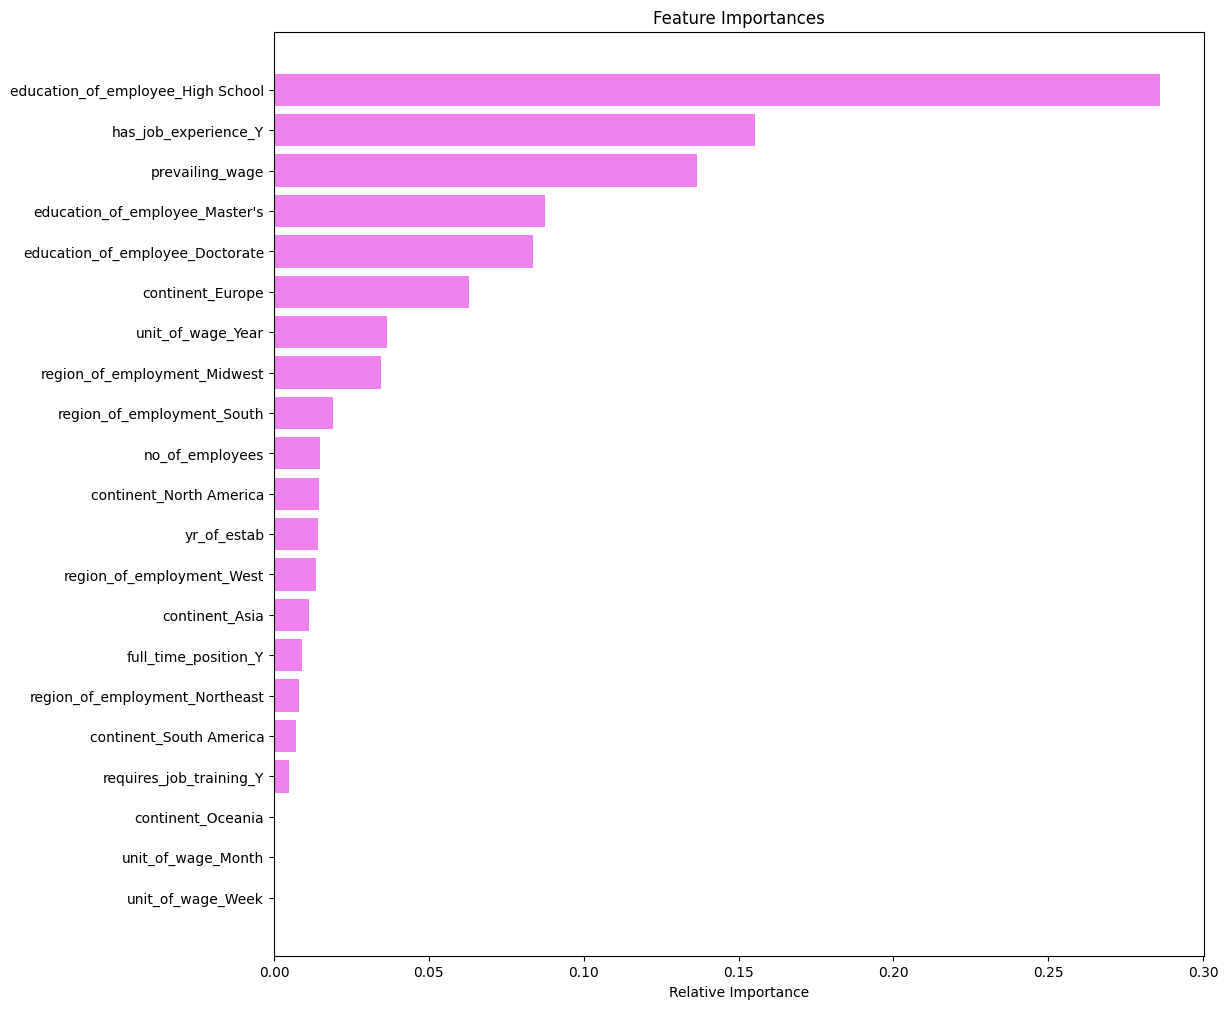

In [117]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- The most important feature in determining the visa approval is education level of employee.
- The following features are also important to determine the visa approval - has job experience , unit of wage and continent.

## Business Insights and Recommendations

- Based on the analysis of the data and the XGBoost tuned model, here are recommendations to facilitate the visa approval process and recommend suitable profiles for visa certification:

1. Prioritize High Probability Candidates: Utilize the XGBoost tuned model to identify applicants who have a higher probability of visa approval. Focus on shortlisting candidates who possess attributes associated with a higher chance of certification, such as higher education levels (e.g., master's or doctoral degrees), relevant job experience, and higher prevailing wages. Prioritize the review and processing of applications from these candidates to speed up the visa approval process.

2. Streamline Application Review: Implement an automated pre-screening system that utilizes the classification model to filter out applications with a low probability of approval. This system can help reduce the manual effort required for reviewing every case and allows immigration officers to focus on applications that have a higher chance of success. This streamlining can significantly improve the efficiency of the visa approval process.


3. Facilitate Employer-Employee Match: Collaborate with employers to identify specific job positions and skill requirements that align with the drivers of visa approval. This can help employers attract and select candidates who have a higher chance of certification - visa approval rate. Provide guidance to employers on crafting job descriptions, offering competitive wages, and specifying educational and experience requirements that meet visa approval criteria.

4. Transparent Communication: Maintain open and transparent communication channels with applicants, employers, and immigration authorities. Provide clear guidelines on the visa application process, requirements, and potential factors that influence case status. Regularly update applicants and employers on the status of their applications and provide feedback on areas for improvement, if applicable.

By implementing these recommendations,the visa approval process will be streamlined and reduce the burden of reviewing every case, and improve the overall efficiency and effectiveness of the system. This data-driven approach will help identify suitable profiles for visa certification and enhance the chances of successful approvals.


-


___